# 作業

實作模糊與邊緣檢測

- 透過 Gaussian Filter 實作模糊操作
- 透過 Sobel Filter 實作邊緣檢測

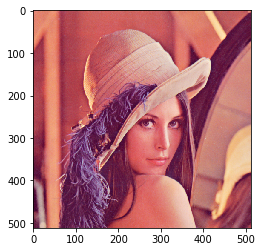

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
IMG_PATH = "Part01/lena.png"

img = cv2.imread(IMG_PATH,cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## 模糊操作

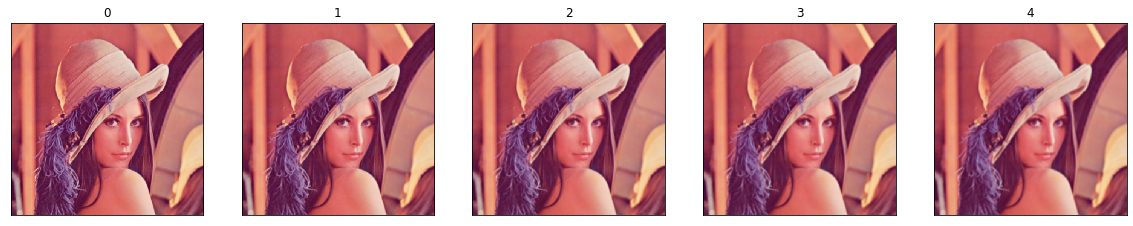

In [31]:
img_blur = img.copy()

fig,ax=plt.subplots(1,5, figsize=(20,20))

for i in range(5):
    # cv2.GaussianBlur(img, (filter大小), X 軸的標準差，設為 0 會根據 filter size ⾃⼰算)    
    img_blur = cv2.GaussianBlur(img_blur, (3,3), 0)
    ax[i].imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
    ax[i].set_title(str(i))
    ax[i].set_xticks([]);ax[i].set_yticks([]) 

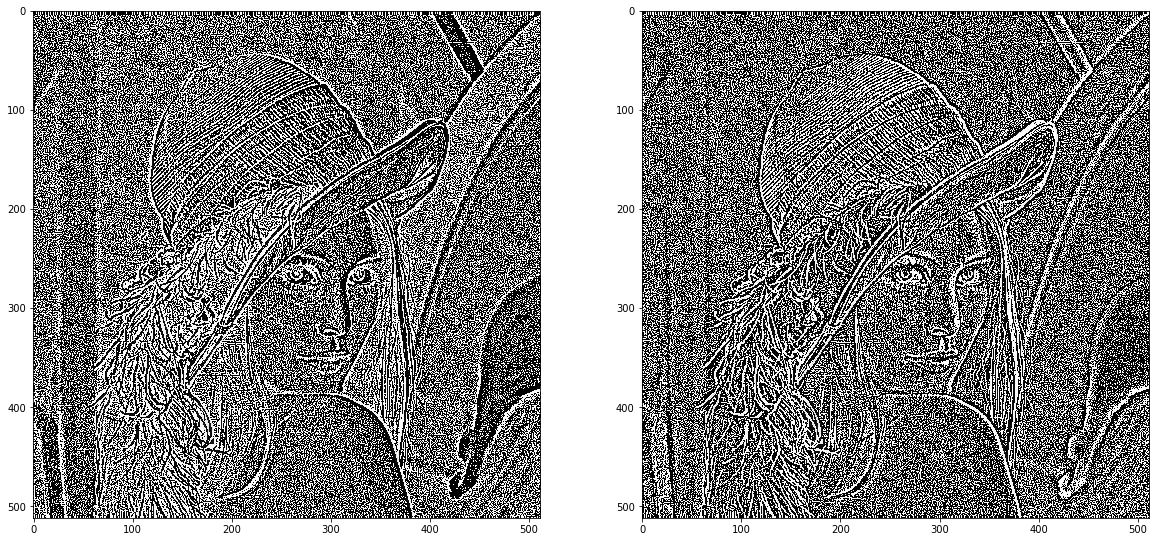

In [45]:
img_blur = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)

img_blur1 = cv2.GaussianBlur(img_blur, (3,3), 0)


img_blur_diff1 = img_blur-img_blur1
img_blur_diff2 = img_blur1-img_blur

figure = plt.figure(2, figsize=(20,20))
ax1 = figure.add_subplot(121)
ax1.imshow(cv2.cvtColor(img_blur_diff1, cv2.COLOR_GRAY2RGB))
ax2 = figure.add_subplot(122)
ax2.imshow(cv2.cvtColor(img_blur_diff2, cv2.COLOR_GRAY2RGB))

## 邊緣檢測

### 比較 Sobel 如果在 uint8 的情況下做會 overflow 的狀況

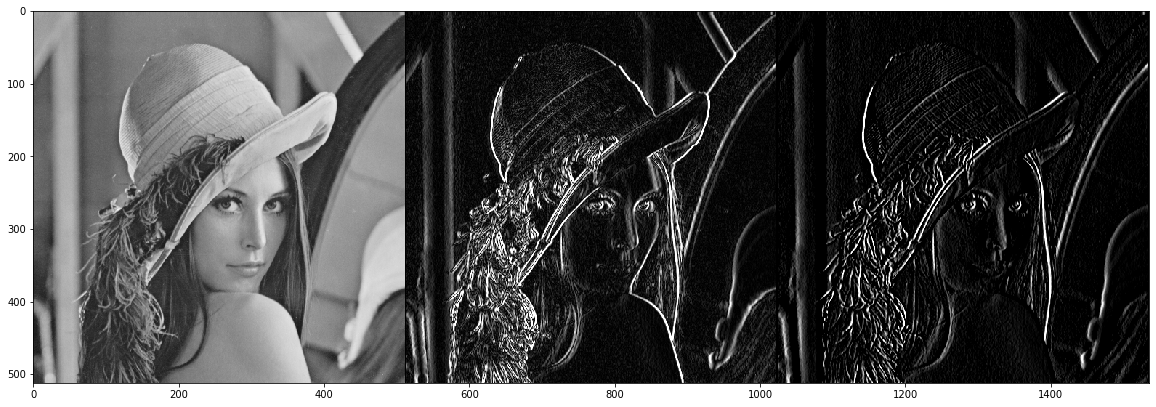

In [40]:
# 轉為灰階圖片
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 對 x 方向以包含負數的資料格式 (cv2.CV_16S) 進行 Sobel 邊緣檢測
# cv2.Sobel(img_grey, cv2.CV_16S 轉為16位有號數避免數值不連續, x軸求導次數, x軸求導次數, Sobel Operator 大小)
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy =0, ksize=3) 

# 對 x 方向依照比例縮放到所有數值都是非負整數
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 對 x 方向直接以非負整數的資料格式 (uint8) 進行 Sobel 邊緣檢測
img_sobel_x_uint8 = cv2.Sobel(img_grey, cv2.CV_8U, dx=1, dy =0, ksize=3) 

#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_x_uint8))
img_show = cv2.cvtColor(img_show, cv2.COLOR_GRAY2RGB)
plt.figure(figsize=(20,20))
plt.imshow(img_show)


### 比較一次與兩次計算偏微分的結果

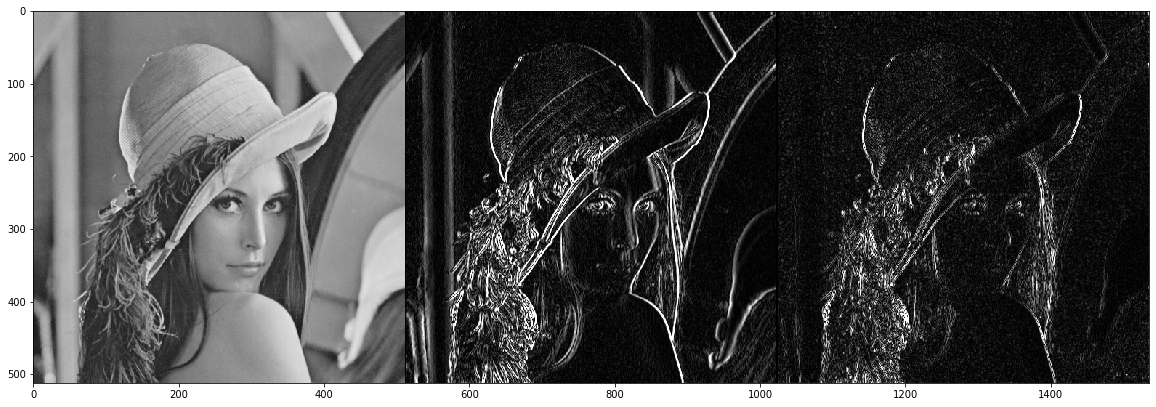

In [50]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 求一次導數取得邊緣檢測結果
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy =0, ksize=3) 
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)


# 求二次導數取得邊緣檢測結果
img_sobel_xx = cv2.Sobel(img_grey, cv2.CV_16S, dx=2, dy =0, ksize=3) 
img_sobel_xx = cv2.convertScaleAbs(img_sobel_xx)

#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_xx))
img_show = cv2.cvtColor(img_show, cv2.COLOR_GRAY2RGB)
plt.figure(figsize=(20,20))
plt.imshow(img_show)

### 比較增加 Sobel Operator 大小

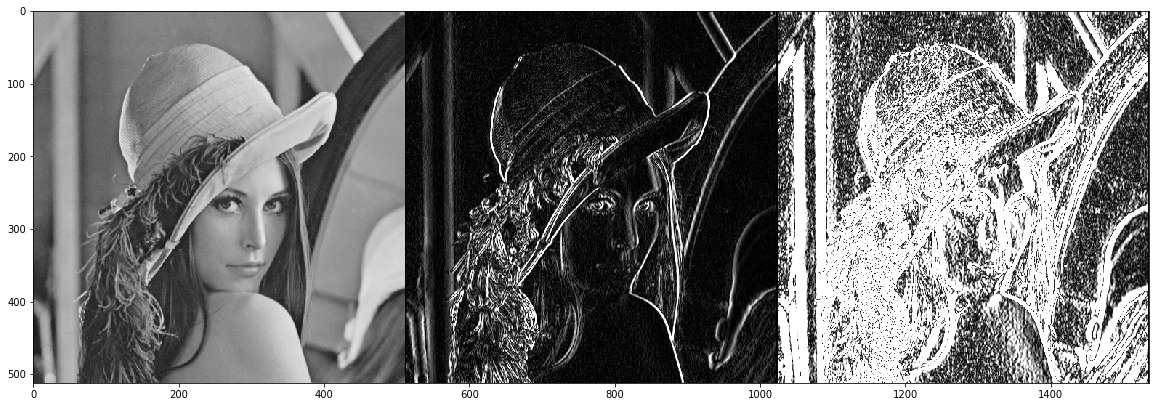

In [56]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 求ksize=3
img_sobel_3 = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy =0, ksize=3) 
img_sobel_3 = cv2.convertScaleAbs(img_sobel_3)

# 求ksize=5
img_sobel_5= cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy =0, ksize=5) 
img_sobel_5= cv2.convertScaleAbs(img_sobel_5)

#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_3, img_sobel_5))
img_show = cv2.cvtColor(img_show, cv2.COLOR_GRAY2RGB)
plt.figure(figsize=(20,20))
plt.imshow(img_show)